# 多層パーセプトロンを用いたMNISTの分類

KaggleのGetting StartedにあるMNISTデータセットを使った文字画像の識別に挑戦します。
大学の時に画像処理に関する研究をしていましたが、MNISTを使うのはこれが初めて。
初心に帰った気持ちでやろうと思います。

今回は、scikitlearnの多層パーセプトロン（MLP）を用いた解析を実施していきます。

# データの読み込み、前処理

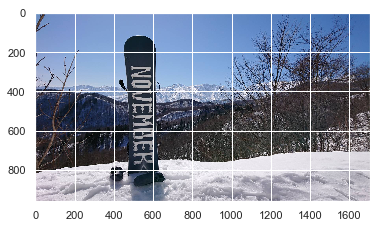

In [81]:
#imshow練習
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.image import imread

lena = imread('dataset/test.jpg')
plt.imshow(lena)

plt.show()

In [6]:
#テストデータのインポート

import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
 
train = pd.read_csv('dataset/train.csv') #学習データ
test = pd.read_csv('dataset/test.csv') #テストデータ
print('The size of the train data:' + str(train.shape))
print('The size of the test data:' + str(test.shape))

The size of the train data:(42000, 785)
The size of the test data:(28000, 784)


In [8]:
train.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7          3       0       0       0       0       0       0       0       0   
8          5       0       0       0       0       0       0       0       0   
9          3       0       0       0       0       0       0       0       0   
10         8       0       0       0       0       0       0       0       0   
11        

labelのカラムに正解データが格納されていて、pixek〇〇にピクセルごとの画素の値が格納されています。

型も見てみましょう

In [11]:
#データの型をチェック
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
            ...  
pixel754    int64
pixel755    int64
pixel756    int64
pixel757    int64
pixel758    int64
pixel759    int64
pixel760    int64
pixel761    int64
pixel762    int64
pixel763    int64
pixel764    int64
pixel765    int64
pixel766    int64
pixel767    int64
pixel768    int64
pixel769    int64
pixel770    int64
pixel771    int64
pixel772    int64
pixel773    int64
pixel774    int64
pixel775    int64
pixel776    int64
pixel777    int64
pixel778  

全てint型になってますね。

Label以外はfloat型に変換してデータをXtrain,ytrain,Xtestに分割しましょう。

In [12]:
#　教師データ、テストデータに分類して、float型に変換する。
X_train = (train.iloc[:,1:].values).astype('float32') #ピクセルの値をfloatに変換
y_train = train.iloc[:,0].values
X_test = test.values.astype('float32') #ピクセルの値をfloatに変換

In [13]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [14]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

次にreshape関数を利用して、データを28×28の画像に変換します。

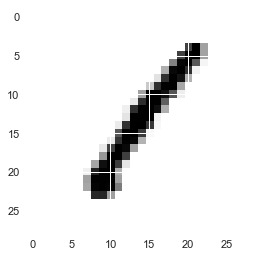

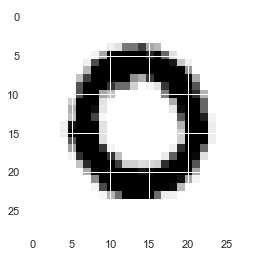

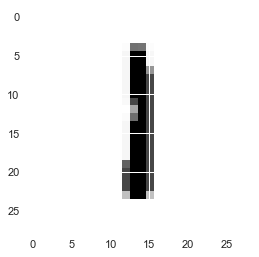

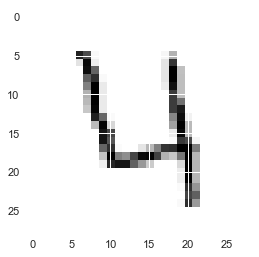

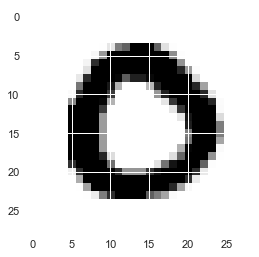

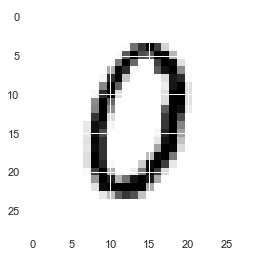

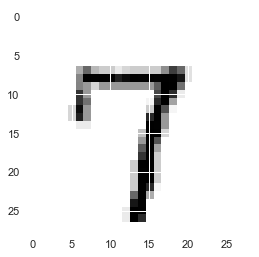

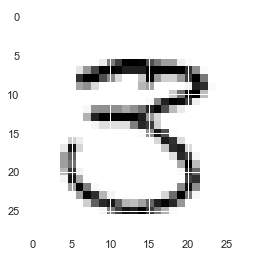

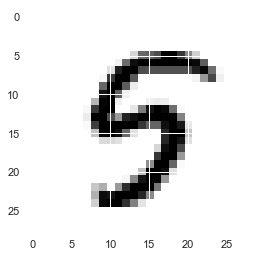

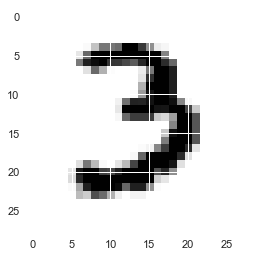

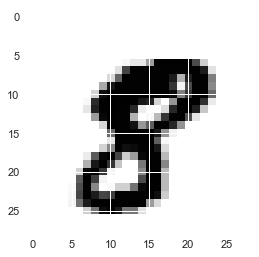

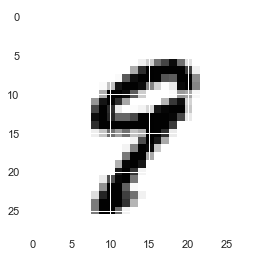

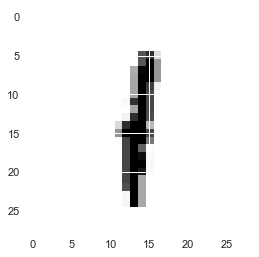

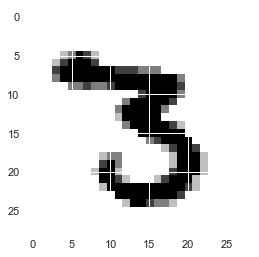

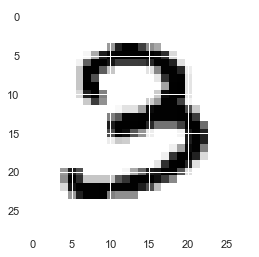

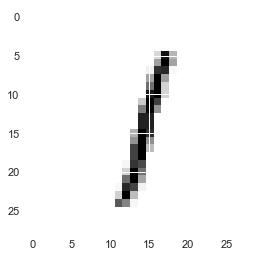

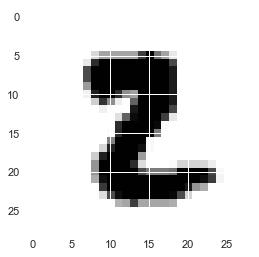

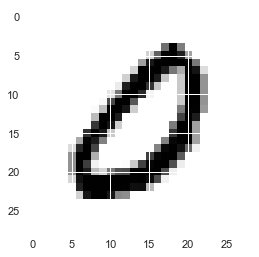

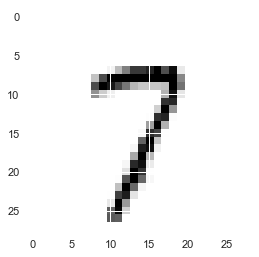

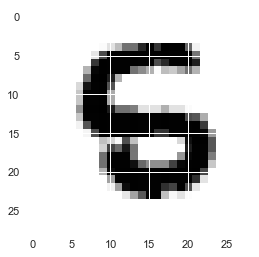

In [30]:
#X_train[0].reshape(28,28)
for i in range(20):#とりあえず20枚出力

    plt.imshow(X_train[i,:].reshape(28,28), cmap=plt.cm.gray_r)
    plt.show()


画像化成功しました。だいぶクセありますね。（特に20枚目の5と思われる字）

最後に教師データを train_test_split関数を用いて分割していきます。

In [34]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train,
                                                        y_train, # 正解データを数値にする
                                                        test_size = 0.2,
                                                        train_size = 0.8,#教師データ少なくなるのが怖いので4:1で分割
                                                        stratify = y_train)
print(f'X_train の長さ: {len(X_train2)}')
print(f'X_test の長さ: {len(X_test2)}')
print(f'X_train の内容: {X_train2}')
print(f'X_test の内容: {X_test2}')
print(f'y_train の内容: {y_train2}')
print(f'y_test の内容: {y_test2}')

X_train の長さ: 33600
X_test の長さ: 8400
X_train の内容: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_test の内容: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train の内容: [0 1 3 ... 5 3 1]
y_test の内容: [6 4 3 ... 6 2 8]


これでデータ下準備完了です。

# 多層パーセプトロンを用いて識別

データの用意できたので、多層パーセプトロンを用いた識別を実施していきます。
今回は、scikitlearnのMLPClassifierを利用します。

早速importしていきましょう。


In [39]:
from sklearn.neural_network import MLPClassifier

#隠れ層　100、100　活性化関数　relu で実装　その他は適当
def sklearn_mlp():
    mlf = MLPClassifier(hidden_layer_sizes=(100,100), solver='adam', max_iter=20, verbose=10, random_state=0)
    mlf.fit(X_train2, y_train2)
    print('accuracy_score: %.3f' % mlf.score(X_test2, y_test2))
%time sklearn_mlp()

Iteration 1, loss = 2.89878361
Iteration 2, loss = 0.86191602
Iteration 3, loss = 0.51868066
Iteration 4, loss = 0.35139667
Iteration 5, loss = 0.24289586
Iteration 6, loss = 0.19045142
Iteration 7, loss = 0.15612827
Iteration 8, loss = 0.12213968
Iteration 9, loss = 0.11302399
Iteration 10, loss = 0.11097013
Iteration 11, loss = 0.08837336
Iteration 12, loss = 0.08776405
Iteration 13, loss = 0.09631755
Iteration 14, loss = 0.08548279
Iteration 15, loss = 0.09076070
Iteration 16, loss = 0.08660899
Iteration 17, loss = 0.08626077
Iteration 18, loss = 0.11242479
Iteration 19, loss = 0.11499695
Iteration 20, loss = 0.09038487
accuracy_score: 0.951
Wall time: 21 s


C:\Users\takes\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


正答率95.1%

そこそこ精度高いんじゃないでしょうか？
パラメータ調整は後からするとして、いったん提出してみましょう。

In [70]:
#上記のパラメータで提出する。
from sklearn.neural_network import MLPClassifier

#def sklearn_mlp():
mlp = MLPClassifier(hidden_layer_sizes=(100,100), solver='adam', max_iter=20, verbose=10, random_state=0)
mlp.fit(X_train, y_train)
#y_pred = mlf.predict(X_test)


#ImageIdを1からスタートさせる処理
#my_mlf.to_csv("my_mlf_1.csv", index_label = ["imageid"])

my_mlp = pd.DataFrame()
imageid = []

for i in range(len(X_test)):
    imageid.append(i+1)
    
my_mlp['ImageId'] = imageid
my_mlp["label"] = mlf.predict(X_test)
my_mlp.to_csv("my_mlp_1.csv", index=False)


print('csv書き出し終了')

##予測データとIdをデータフレームへ落とし込む
#my_mlf = pd.DataFrame(y_pred, ImageId, columns = ["Label"])

## csvに書き出し
#my_mlf.to_csv("my_mlf_1.csv", index_label = ["Id"])
#print('書き出し終了')

Iteration 1, loss = 2.57687918
Iteration 2, loss = 0.73848053
Iteration 3, loss = 0.44846465
Iteration 4, loss = 0.31059447
Iteration 5, loss = 0.23657482
Iteration 6, loss = 0.18961008
Iteration 7, loss = 0.15171713
Iteration 8, loss = 0.13450295
Iteration 9, loss = 0.12637660
Iteration 10, loss = 0.10477283
Iteration 11, loss = 0.10241580
Iteration 12, loss = 0.10472031
Iteration 13, loss = 0.07978529
Iteration 14, loss = 0.08796402
Iteration 15, loss = 0.09168370
Iteration 16, loss = 0.08982356
Iteration 17, loss = 0.09578159
Iteration 18, loss = 0.09221845
Iteration 19, loss = 0.10897262
Iteration 20, loss = 0.09681042


C:\Users\takes\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


csv書き出し終了


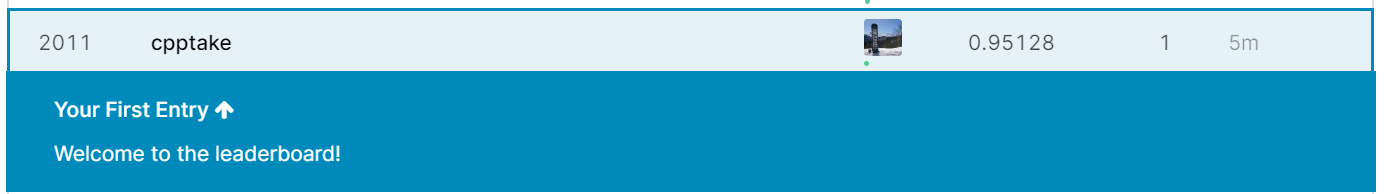

Score:95.128%  

順位：2011位/2352位中(4/12現在）

95%いい結果かと思いきや、下から数えたほうがはるかに速いという結果になりました。
これはいかん。



# RandomizedSearchCVを利用したパラメータチューニング

デフォルトのままでは精度が高くないので、パラメータ調整をしていきます。

調べてみたところ、ニューラルネットワークではパラメータが多いのでRandomizedSearchCVが適しているとのこと。
使ってみようと思います。

出展：https://zerofromlight.com/blogs/detail/28/

In [73]:
#RandomizedSearchCVをセット
from sklearn.model_selection import RandomizedSearchCV

mlp = MLPClassifier(random_state=0)



#　ランダムサーチに渡すためのパラメータ値の設定
#　特に根拠はなく下記の値で設定

random_search = {'batch_size': [300, 350, 400, 450],
               'hidden_layer_sizes': [(150, 150), (100, 100, 50), (150, 100, 50)],
               'max_iter': [400, 500, 600, 700, 800],
               'activation':['tanh','relu'],
               'random_state': [0]}

mlp_random_search = RandomizedSearchCV(mlp, random_search, cv=4,
                                   n_jobs=-1, scoring='accuracy', random_state=0)

mlp_random_search = mlp_random_search.fit(X_train, y_train)
#best_param = mlp_random_search.best_params_
best_param = mlp_random_search.best_estimator_


print(mlp_random_search.best_score_)
print("grid_best = ",best_param)
print("best params = ",best_param.best_params_)


#スケーリングしたデータで実行します
#grid = GridSearchCV(mlp, random_search,cv=4)
#mlp_random_search = mlp_random_search.fit(X_train, y_train)
#grid_best = grid.best_estimator_



0.9514523809523809
grid_best =  MLPClassifier(activation='tanh', alpha=0.0001, batch_size=450, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=700, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


AttributeError: 'MLPClassifier' object has no attribute 'best_params_'

In [74]:
best_param

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=450, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=700, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

パラメータ調整終了しました！
全体の評価も見てみましょう。

In [75]:

cvres = mlp_random_search.cv_results_
for score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(score, params)

0.9514523809523809 {'random_state': 0, 'max_iter': 700, 'hidden_layer_sizes': (150, 150), 'batch_size': 450, 'activation': 'tanh'}
0.9492857142857143 {'random_state': 0, 'max_iter': 800, 'hidden_layer_sizes': (150, 150), 'batch_size': 400, 'activation': 'relu'}
0.9497142857142857 {'random_state': 0, 'max_iter': 400, 'hidden_layer_sizes': (100, 100, 50), 'batch_size': 400, 'activation': 'relu'}
0.9428809523809524 {'random_state': 0, 'max_iter': 700, 'hidden_layer_sizes': (100, 100, 50), 'batch_size': 300, 'activation': 'tanh'}
0.9497142857142857 {'random_state': 0, 'max_iter': 600, 'hidden_layer_sizes': (100, 100, 50), 'batch_size': 400, 'activation': 'relu'}
0.9451904761904761 {'random_state': 0, 'max_iter': 600, 'hidden_layer_sizes': (100, 100, 50), 'batch_size': 350, 'activation': 'tanh'}
0.9428809523809524 {'random_state': 0, 'max_iter': 600, 'hidden_layer_sizes': (100, 100, 50), 'batch_size': 300, 'activation': 'tanh'}
0.9473333333333334 {'random_state': 0, 'max_iter': 400, 'hidden

ということで、Bestのパラメータで識別を実施してみましょう。

In [79]:

#mlp_bestにベストパラメータを入れてcsvに出力

#best_mlp = mlp_random_search.best_estimator_
#best_mlp
mlp_best = MLPClassifier(activation='tanh', alpha=0.0001, batch_size=450, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_iter=700, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

mlp_best.fit(X_train, y_train)


my_mlp2 = pd.DataFrame()
imageid2 = []

for i in range(len(X_test)):
    imageid2.append(i+1)
    
my_mlp2['ImageId'] = imageid
my_mlp2["label"] = mlp_best.predict(X_test)
my_mlp2.to_csv("my_mlp_2.csv", index=False)


print('csv書き出し終了')



csv書き出し終了


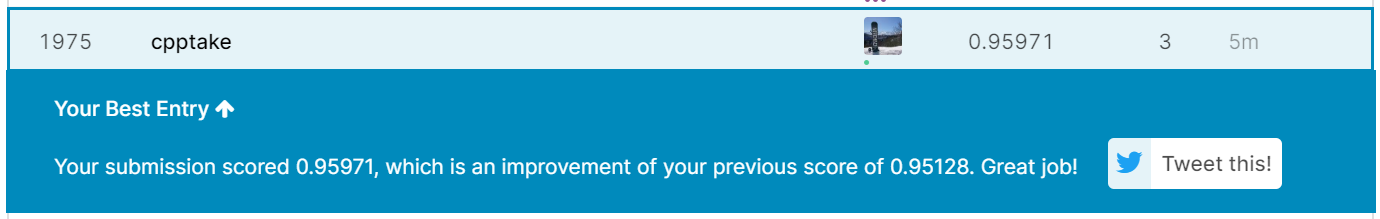

Score : 95.971%  順位 : 1975位/2367位　前回から50位ほど上がりました！

調べてみると、上位1000位に入るためにはScoreが99%を目指す必要があるようです。

多層パーセプトロンだけで精度上げるにはもう少し工夫が必要そうなので、
次回はCNNなどを使って精度上げようかと思います。